# Credit Scoring

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import 
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, f1_score, roc_curve,confusion_matrix, roc_auc_score, classification_report
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from tqdm.notebook import tqdm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.under_sampling import RandomUnderSampler
import pickle
TARGET_NAME = 'SeriousDlqin2yrs'

## Reading data dictionary

- SeriousDlqin2yrs Y/N
- RevolvingUtilizationOfUnsecuredLines  percentage
- age	integer
- NumberOfTime30-59DaysPastDueNotWorse integer
- DebtRatio percentage
- MonthlyIncome	real
- NumberOfOpenCreditLinesAndLoans	integer
- NumberOfTimes90DaysLate	integer
- NumberRealEstateLoansOrLines	integer
- NumberOfTime60-89DaysPastDueNotWorse	integer
- NumberOfDependents	integer

# Reading data

In [2]:
df_raw = pd.read_csv("cs-training.csv",index_col=0)

X = df_raw.copy()
X.drop('SeriousDlqin2yrs', inplace=True,axis=1)
y = df_raw['SeriousDlqin2yrs'].copy()


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33, random_state=42)

In [3]:
X_train['SeriousDlqin2yrs'] = y_train

In [312]:
df = X_train.copy()

# Data Cleaning

Defining functions to check na and adequacy

In [473]:
pd.DataFrame(scaler.transform(x))

,0,1,2,3,4,5,6,7,8,9
0,-0.025257,1.062806,-0.100945,0.269484,0.002406,-0.865798,-0.064532,-0.014609,-0.058325,-0.677192
1,-0.020443,-1.239477,-0.100945,-0.210990,-0.199899,-1.255151,-0.064532,-0.905225,-0.058325,-0.677192
2,-0.020440,-0.900906,-0.100945,0.939670,-0.014717,-0.671122,-0.064532,0.876007,-0.058325,-0.677192
3,-0.022113,-0.020622,-0.100945,-0.210903,-0.152598,0.302258,-0.064532,-0.905225,-0.058325,1.129540
4,-0.020443,0.114807,0.600707,0.258044,-0.014717,-0.671122,0.405736,-0.014609,0.413552,0.226174
...,...,...,...,...,...,...,...,...,...,...
200995,-0.025130,0.250235,-0.100945,-0.210842,0.472592,-0.087094,-0.064532,0.876007,-0.058325,-0.677192
200996,-0.023327,-0.968620,-0.100945,-0.210958,0.081848,-0.476446,-0.064532,-0.905225,-0.058325,3.839637
200997,-0.024734,0.588806,-0.100945,-0.210931,0.204254,-0.281770,-0.064532,-0.014609,-0.058325,-0.677192
200998,-0.025163,1.536805,-0.100945,0.112927,0.002406,0.496935,-0.064532,-0.905225,-0.058325,-0.677192


In [6]:
x,y = my_pipe(X_train,y_train,False)

def check_adequacy(df):
    """ Checking adequacy of columns, meaning, age >= 18 
        Not null values
        Change nulls to some variable depends on age (two categories <60, and >=60)
    """
    
    #taking mean of price to age <18,60)
    mean_income_18_to_60 = df[(df['age']>=18) & (df['age'] <60)]['MonthlyIncome'].mean()
    #taking mean of price to age <60,inf)
    mean_income_60_plus = df[df['age']>=60]['MonthlyIncome'].mean()
    #mean of dependents, age <60,inf)
    mean_dependents_60_plus = round(df[df['age']>=60]['NumberOfDependents'].mean(),0) #rounding number because of integer
    #mean of dependents, age <18,60)
    mean_dependentse_18_to_60 = round(df[df['age']<60]['NumberOfDependents'].mean(),0) #rounding number because of integer

    #assign values to nulls
    df.loc[(df['age']>=60) & (df['MonthlyIncome']==0),'MonthlyIncome'] = mean_income_60_plus
    df.loc[(df['age']>=18) & (df['age']<60) & (df['MonthlyIncome']==0),'MonthlyIncome'] = mean_income_18_to_60
    
    df.loc[(df['age']>=60) & (df['MonthlyIncome'].isnull()),'MonthlyIncome'] = mean_income_60_plus
    df.loc[(df['age']>=18) & (df['age']<60) & (df['MonthlyIncome'].isnull()),'MonthlyIncome'] = mean_income_18_to_60
    df.loc[df['age']<18,'age'] = 18
    
    df.loc[((df['NumberOfDependents'].isnull()) & (df['age'] < 60)), 'NumberOfDependents'] = mean_dependentse_18_to_60
    df.loc[((df['NumberOfDependents'].isnull()) & (df['age'] >= 60)), 'NumberOfDependents'] = mean_dependents_60_plus
    df["log_MonthlyIncome"] = np.log(df['MonthlyIncome'])
    
    return df

In [5]:
def check_na_values(df):
    """Checking NA values in data frame"""
    null_flag = False
    
    for column in df.columns:

        if len(df[df[column].isnull()]) != 0:
            print(f'Found {len(df[df[column].isnull()])} NA Values in {column}')
            null_flag = True
            
    return null_flag

In [7]:
def upsampling_target(df):
    
    upsample_df = pd.DataFrame()
    df_to_upsample = df.copy()
    
    for repeats in tqdm(range(7)):
        sample = resample(df_to_upsample)
        upsample_df = pd.concat([df_to_upsample, sample])
    
    upsampled_df = pd.concat([df, upsampling_target_df])
    upsampled_df = upsampled_df.sample(frac=1)
    upsampled_df = upsampled_df.reset_index(drop=True)
    
    return upsample_df

In [4]:
def my_pipe(x,y,is_upsampling, standardize=True):
    scaler = StandardScaler()
    x['SeriousDlqin2yrs'] = y
    df = x.copy()
    new_DF = check_adequacy(df).copy()
    
    if is_upsampling:
        new_DF = upsampling_target(new_DF)
    
    
    print(check_na_values(new_DF))
    
    X = df
    y = new_DF[TARGET_NAME].copy()
    new_DF.drop(TARGET_NAME, inplace=True,axis=1)
    
    if standardize:
        scaler.fit(new_DF)
        x = pd.DataFrame(scaler.transform(new_DF),columns=x.columns)
  
    return (x,y)

In [488]:
x.head(10)

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.025994,1.063413,-0.100547,0.251519,0.006437,-0.866960,-0.064728,-0.016488,-0.058774,-0.678067,0.286652
1,-0.021232,-1.236859,-0.100547,-0.196226,-0.224127,-1.255952,-0.064728,-0.908824,-0.058774,-0.678067,-0.247483
2,-0.021229,-0.898584,-0.100547,0.876053,-0.013079,-0.672464,-0.064728,0.875847,-0.058774,-0.678067,0.249678
3,-0.022884,-0.019068,-0.100547,-0.196145,-0.170220,0.300015,-0.064728,-0.908824,-0.058774,1.126974,-0.099387
4,-0.021232,0.116242,0.591433,0.240858,-0.013079,-0.672464,0.398985,-0.016488,0.406455,0.224454,0.249678
5,-0.025680,-0.763274,-0.100547,-0.196051,-0.394382,0.883503,-0.064728,-0.016488,-0.058774,0.224454,-0.893537
6,-0.023385,-0.222033,0.360773,-0.196113,-0.113968,-0.283473,-0.064728,-0.016488,-0.058774,1.126974,0.037663
7,-0.025563,-0.357343,-0.100547,-0.196015,0.190728,1.661487,-0.064728,0.875847,-0.058774,0.224454,0.588537
8,-0.025766,0.928103,-0.100547,-0.195834,-0.442102,0.494511,-0.064728,-0.016488,-0.058774,0.224454,-1.162548
9,-0.023062,-0.627964,-0.100547,-0.196223,0.073537,0.300015,0.167128,-0.908824,-0.058774,-0.678067,0.405645


,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs,log_MonthlyIncome
87936,0.000000,68,0,798.000000,6784.284712,4,0,1,0,0.0,0,8.822364
3893,1.000000,34,0,0.058946,4325.000000,2,0,0,0,0.0,0,8.372167
41405,1.000666,39,0,1911.000000,6576.123871,5,0,2,0,0.0,0,8.791201
91125,0.653085,52,0,0.203020,4900.000000,10,0,0,0,2.0,0,8.496990
67373,1.000000,54,3,779.000000,6576.123871,5,2,1,2,1.0,1,8.791201
...,...,...,...,...,...,...,...,...,...,...,...,...
119880,0.107445,72,0,0.899275,4000.000000,17,0,2,0,1.0,0,8.294050
103695,0.087697,67,1,1781.000000,6784.284712,10,0,1,0,1.0,0,8.822364
131933,0.068788,49,0,0.673331,2800.000000,8,0,2,0,0.0,0,7.937375
146868,0.219630,36,0,0.025316,1500.000000,2,0,0,0,0.0,0,7.313220


## Data exploration

<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='count'>

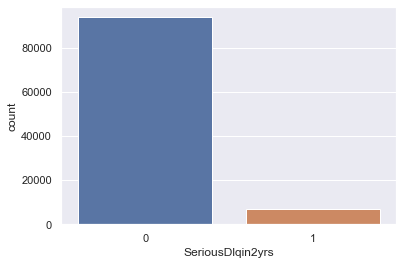

In [492]:
sns.set_theme()
sns.countplot(x=y)

Text(0.5, 0, 'Age')

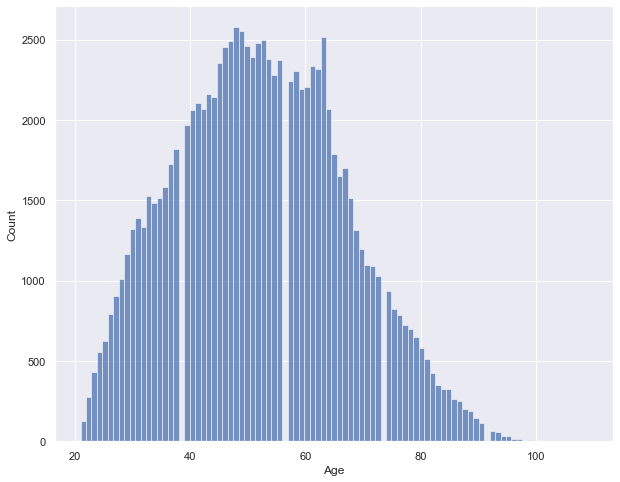

In [494]:
plt.figure(figsize=(10, 8))
sns.histplot(data=X_train, x='age')
plt.xlabel("Age")

<AxesSubplot:>

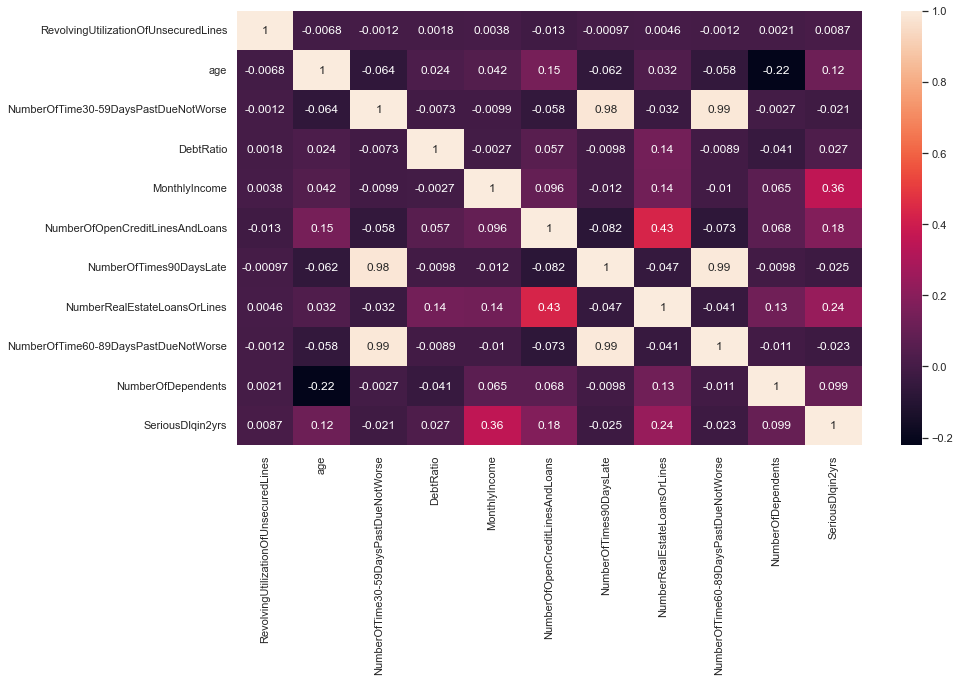

In [496]:
plt.figure(figsize=(14, 8))
sns.heatmap(x.corr(),annot=True)

In [113]:
X_train

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
87936,0.000000,68,0,798.000000,NaN,4,0,1,0,0.0,0
3893,1.000000,34,0,0.058946,4325.0,2,0,0,0,0.0,0
41405,1.000666,39,0,1911.000000,NaN,5,0,2,0,0.0,0
91125,0.653085,52,0,0.203020,4900.0,10,0,0,0,2.0,0
67373,1.000000,54,3,779.000000,NaN,5,2,1,2,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
119880,0.107445,72,0,0.899275,4000.0,17,0,2,0,1.0,0
103695,0.087697,67,1,1781.000000,NaN,10,0,1,0,1.0,0
131933,0.068788,49,0,0.673331,2800.0,8,0,2,0,0.0,0
146868,0.219630,36,0,0.025316,1500.0,2,0,0,0,0.0,0


In [112]:
x

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-0.025994,1.063413,-0.100547,0.251519,0.006437,-0.866960,-0.064728,-0.016488,-0.058774,-0.678067,0.286652
1,-0.021232,-1.236859,-0.100547,-0.196226,-0.224127,-1.255952,-0.064728,-0.908824,-0.058774,-0.678067,-0.247483
2,-0.021229,-0.898584,-0.100547,0.876053,-0.013079,-0.672464,-0.064728,0.875847,-0.058774,-0.678067,0.249678
3,-0.022884,-0.019068,-0.100547,-0.196145,-0.170220,0.300015,-0.064728,-0.908824,-0.058774,1.126974,-0.099387
4,-0.021232,0.116242,0.591433,0.240858,-0.013079,-0.672464,0.398985,-0.016488,0.406455,0.224454,0.249678
...,...,...,...,...,...,...,...,...,...,...,...
100495,-0.025482,1.334034,-0.100547,-0.195755,-0.254597,1.661487,-0.064728,0.875847,-0.058774,0.224454,-0.340166
100496,-0.025576,0.995758,0.130113,0.803106,0.006437,0.300015,-0.064728,-0.016488,-0.058774,0.224454,0.286652
100497,-0.025666,-0.222033,-0.100547,-0.195882,-0.367100,-0.088977,-0.064728,0.875847,-0.058774,-0.678067,-0.763342
100498,-0.024948,-1.101549,-0.100547,-0.196245,-0.488979,-1.255952,-0.064728,-0.908824,-0.058774,-0.678067,-1.503868


<AxesSubplot:xlabel='SeriousDlqin2yrs', ylabel='MonthlyIncome'>

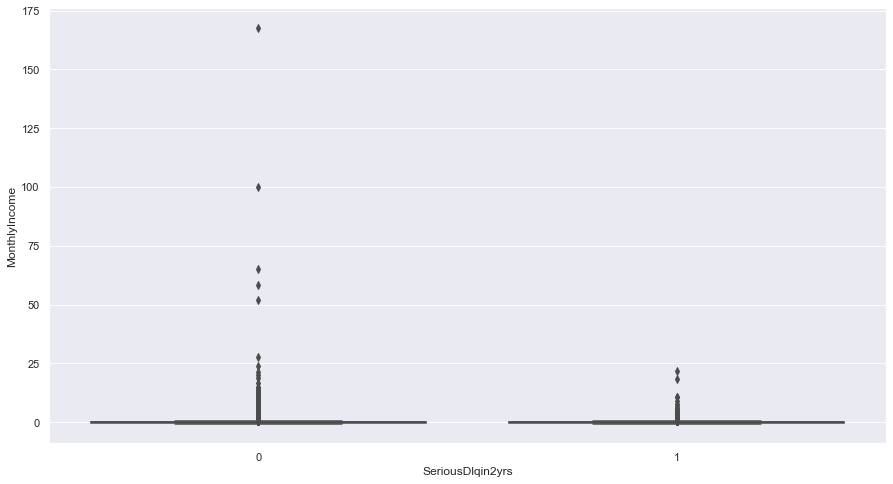

In [506]:
plt.figure(figsize = (15,8))
sns.boxplot(x=y,y='MonthlyIncome',data=x)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='SeriousDlqin2yrs'>

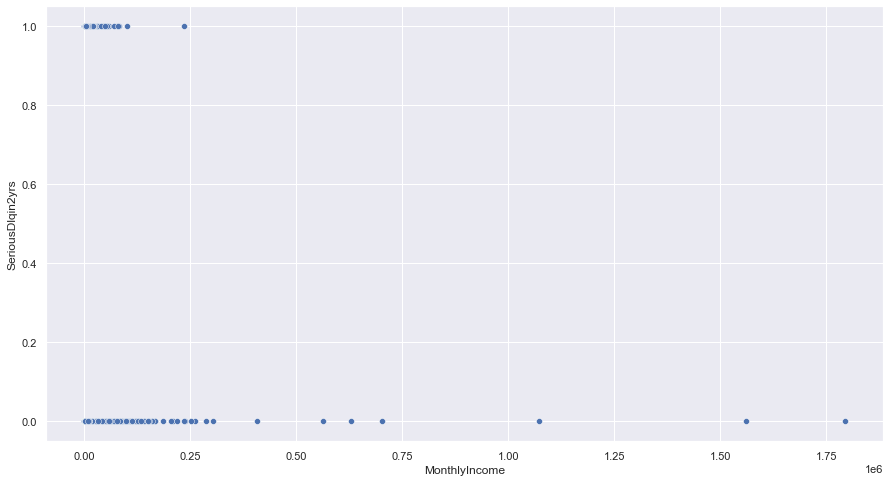

In [509]:
plt.figure(figsize = (15,8))
sns.scatterplot(x="MonthlyIncome", y=y_train, data=X_train)

# Modeling

Because data is imbalanced we will perform undersampling and try to apply different Machine Learning algorithms

In [29]:
xtest,ytest = my_pipe(X_test,y_test,False)

False


In [15]:
undersample = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
x_over, y_over = undersample.fit_resample(x, y)

In [26]:
len(y[y==1])/len(y[y==0])

0.07226306187117906

In [25]:
len(y_over[y_over==1])/len(y_over[y_over==0])

0.5

## Logistic Regression

In [527]:
xtest, y_test = my_pipe(X_test,y_test,False)

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'SeriousDlqin2yrs'],
      dtype='object')
False


In [115]:
log_reg = LogisticRegression(max_iter=750, solver='saga')
log_reg.fit(x_over, y_over)

LogisticRegression(max_iter=750, solver='saga')

In [116]:
predicted_log_reg = log_reg.predict(xtest)

In [117]:
roc_auc_value_log = roc_auc_score(y_test, predicted_log_reg)
print(roc_auc_value_log)

0.6163493553782978


## Decision Tree

In [533]:
dtc = DecisionTreeClassifier(min_impurity_decrease=0.003, criterion='entropy',random_state=42)

In [155]:
xtest.drop('SeriousDlqin2yrs', axis=1, inplace=True)

In [157]:
mid = 0
crit = ['entropy', 'gini']
parameters_metrics_list = [['min_impurity_decrease','criterion','random_state','roc_auc']]
for i in range(25):
    
    mid = mid + 0.0001
    
    for c in crit:
        dtc = DecisionTreeClassifier(min_impurity_decrease=mid, criterion=c ,random_state=42)
        dtc.fit(x_over, y_over)
        predicted_dtc = dtc.predict(xtest)
        
        roc_auc_value_dtc = roc_auc_score(y_test, predicted_dtc)
        
        print("ROC AUC: "+ str(round(roc_auc_value_dtc,4)))
        print(type(classification_report(y_test,predicted_dtc)))
        parameters_metrics_list.append([mid,c,42,roc_auc_value_dtc])
        print(classification_report(y_test,predicted_dtc))

ROC AUC: 0.6368
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.55      0.70     46247
           1       0.10      0.72      0.18      3253

    accuracy                           0.56     49500
   macro avg       0.53      0.64      0.44     49500
weighted avg       0.91      0.56      0.67     49500

ROC AUC: 0.7047
<class 'str'>
              precision    recall  f1-score   support

           0       0.98      0.63      0.76     46247
           1       0.13      0.78      0.22      3253

    accuracy                           0.64     49500
   macro avg       0.55      0.70      0.49     49500
weighted avg       0.92      0.64      0.73     49500

ROC AUC: 0.6916
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.69      0.81     46247
           1       0.14      0.69      0.23      3253

    accuracy                           0.69     49500
   macro avg       0.55      0.69     

ROC AUC: 0.7489
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     46247
           1       0.22      0.66      0.33      3253

    accuracy                           0.82     49500
   macro avg       0.60      0.75      0.61     49500
weighted avg       0.92      0.82      0.86     49500

ROC AUC: 0.7489
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     46247
           1       0.22      0.66      0.33      3253

    accuracy                           0.82     49500
   macro avg       0.60      0.75      0.61     49500
weighted avg       0.92      0.82      0.86     49500

ROC AUC: 0.7489
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     46247
           1       0.22      0.66      0.33      3253

    accuracy                           0.82     49500
   macro avg       0.60      0.75     

ROC AUC: 0.7489
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     46247
           1       0.22      0.66      0.33      3253

    accuracy                           0.82     49500
   macro avg       0.60      0.75      0.61     49500
weighted avg       0.92      0.82      0.86     49500

ROC AUC: 0.7489
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     46247
           1       0.22      0.66      0.33      3253

    accuracy                           0.82     49500
   macro avg       0.60      0.75      0.61     49500
weighted avg       0.92      0.82      0.86     49500

ROC AUC: 0.7489
<class 'str'>
              precision    recall  f1-score   support

           0       0.97      0.83      0.90     46247
           1       0.22      0.66      0.33      3253

    accuracy                           0.82     49500
   macro avg       0.60      0.75     

In [158]:
parameters_metrics_df = pd.DataFrame(parameters_metrics_list, columns=['min_impurity_decrease','criterion','random_state','roc_auc'])
parameters_metrics_df.drop(0, inplace=True)

In [159]:
parameters_metrics_df.sort_values(by='roc_auc', ascending=False).head(10)

,min_impurity_decrease,criterion,random_state,roc_auc
8,0.0004,gini,42,0.755349
9,0.0005,entropy,42,0.755349
11,0.0006,entropy,42,0.755349
26,0.0013,gini,42,0.74893
39,0.002,entropy,42,0.74893
30,0.0015,gini,42,0.74893
31,0.0016,entropy,42,0.74893
32,0.0016,gini,42,0.74893
33,0.0017,entropy,42,0.74893
34,0.0017,gini,42,0.74893


In [161]:
dtc_best = DecisionTreeClassifier(min_impurity_decrease=0.0004, criterion='gini' ,random_state=42)
dtc_best.fit(x_over, y_over)
predicted_dtc_best = dtc.predict(xtest)
#roc_auc_value_dtc = roc_auc_score(y_test, predicted_dtc_best)
#print("ROC AUC: "+ str(round(roc_auc_value_dtc,4)))
#print(classification_report(y_test,predicted_dtc_best))

DecisionTreeClassifier(min_impurity_decrease=0.0004, random_state=42)

## Plotting tree

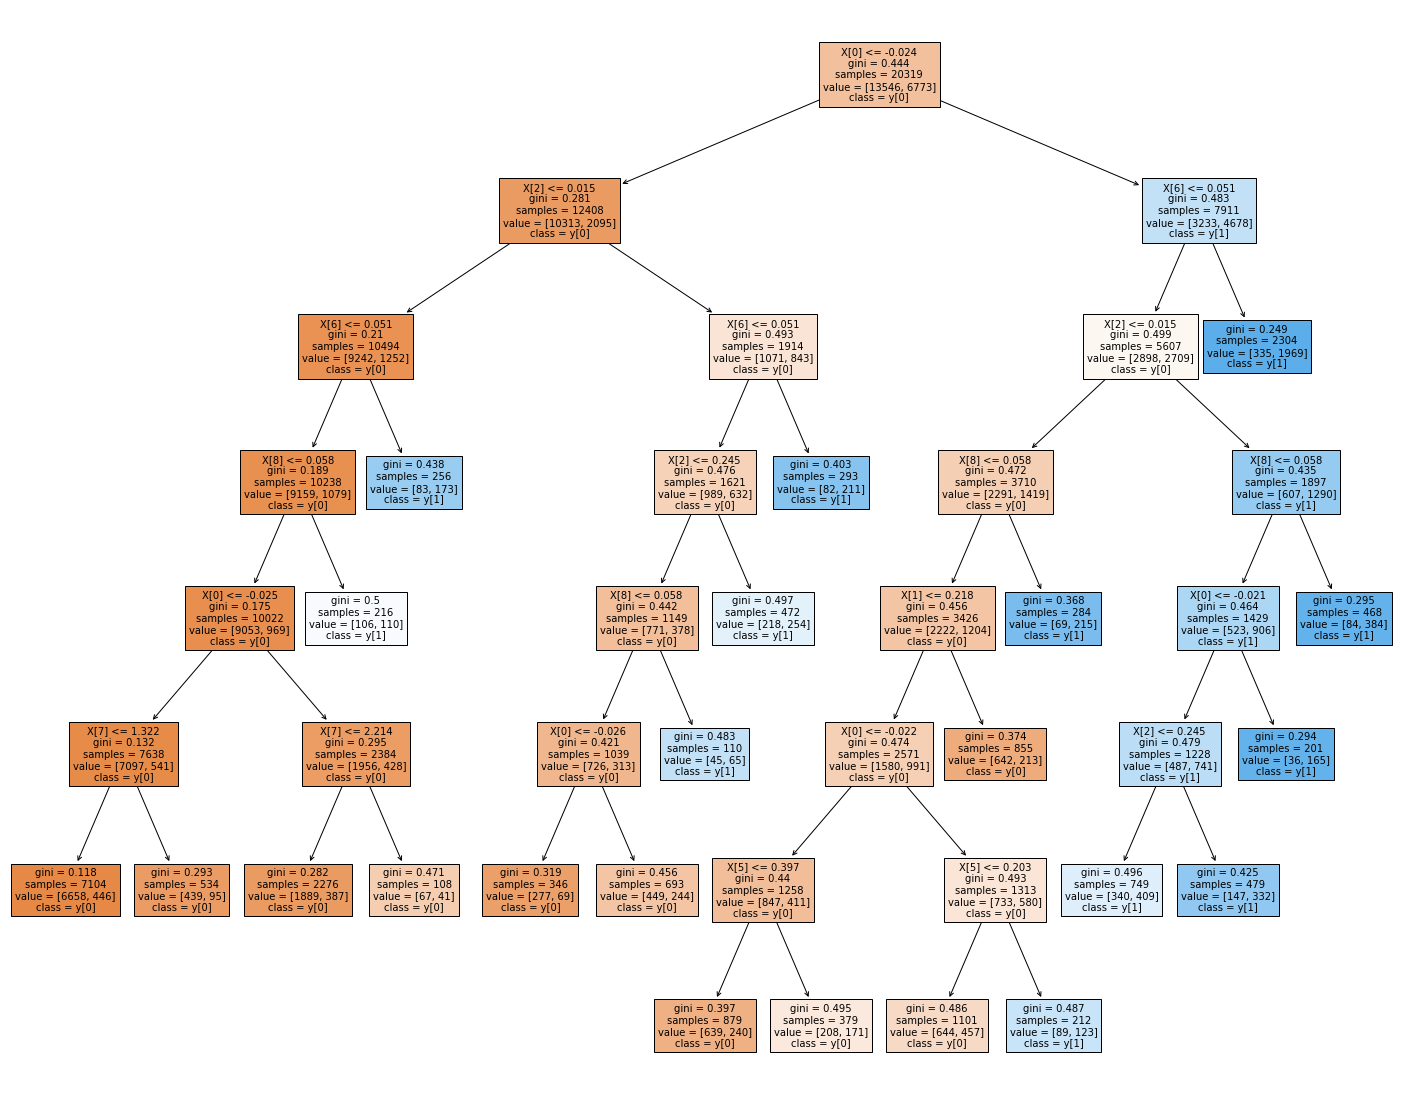

In [181]:
from sklearn import tree
plt.figure(figsize=(25,20))  # set plot size (denoted in inches)
tree.plot_tree(dtc_best, fontsize=10,filled=True, class_names=True)
plt.show()

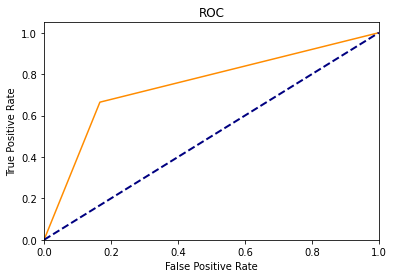

In [111]:
fpr, tpr, thresholds = roc_curve(y_test, predicted_dtc_best,pos_label=1)
plt.figure()
plt.plot(
    fpr,
    tpr,
    color="darkorange")
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC")
plt.show()

## Random Forest

In [37]:
p=[['NoTrees','MaxDepth','ROCAUC']]

for i in tqdm(range(150,501,25)):
    for md in tqdm(range(20,30,1)):
        rfc = RandomForestClassifier(n_estimators=i,random_state=42,max_depth=md, n_jobs=-1)
        rfc.fit(x_over, y_over) #300 23 
        predicted_rfc = rfc.predict(xtest)
        roc_auc_value_rf = roc_auc_score(y_test, predicted_rfc)

        filename = 'finalized_model_rf_' + str(round(roc_auc_value_rf,4))+'.sav'
        pickle.dump(predicted_rfc, open(filename, 'wb'))
        print("ROC AUC: "+ str(round(roc_auc_value_rf,4)))
        #print(classification_report(y_test,predicted_rfc))
        hp = [i,md,roc_auc_value_rf]
        p.append(hp)

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7439
ROC AUC: 0.7461
ROC AUC: 0.7375
ROC AUC: 0.737
ROC AUC: 0.7404
ROC AUC: 0.7347
ROC AUC: 0.7429
ROC AUC: 0.7393
ROC AUC: 0.7349
ROC AUC: 0.7396


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7456
ROC AUC: 0.746
ROC AUC: 0.7381
ROC AUC: 0.7367
ROC AUC: 0.74
ROC AUC: 0.7372
ROC AUC: 0.7402
ROC AUC: 0.7403
ROC AUC: 0.7377
ROC AUC: 0.7397


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7483
ROC AUC: 0.7424
ROC AUC: 0.7385
ROC AUC: 0.7361
ROC AUC: 0.7434
ROC AUC: 0.7372
ROC AUC: 0.7412
ROC AUC: 0.7403
ROC AUC: 0.7368
ROC AUC: 0.7419


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7472
ROC AUC: 0.7422
ROC AUC: 0.7402
ROC AUC: 0.738
ROC AUC: 0.7428
ROC AUC: 0.74
ROC AUC: 0.74
ROC AUC: 0.7409
ROC AUC: 0.7381
ROC AUC: 0.7425


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7472
ROC AUC: 0.7438
ROC AUC: 0.7405
ROC AUC: 0.7393
ROC AUC: 0.7429
ROC AUC: 0.7416
ROC AUC: 0.7412
ROC AUC: 0.74
ROC AUC: 0.7374
ROC AUC: 0.7442


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.747
ROC AUC: 0.7431
ROC AUC: 0.7413
ROC AUC: 0.741
ROC AUC: 0.7415
ROC AUC: 0.7448
ROC AUC: 0.7417
ROC AUC: 0.7418
ROC AUC: 0.7367
ROC AUC: 0.7426


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7457
ROC AUC: 0.7434
ROC AUC: 0.7421
ROC AUC: 0.7414
ROC AUC: 0.7411
ROC AUC: 0.7452
ROC AUC: 0.7427
ROC AUC: 0.7419
ROC AUC: 0.7375
ROC AUC: 0.7435


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7478
ROC AUC: 0.7439
ROC AUC: 0.7437
ROC AUC: 0.7418
ROC AUC: 0.7409
ROC AUC: 0.7435
ROC AUC: 0.7451
ROC AUC: 0.7416
ROC AUC: 0.7366
ROC AUC: 0.7426


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7487
ROC AUC: 0.7432
ROC AUC: 0.7427
ROC AUC: 0.7427
ROC AUC: 0.7411
ROC AUC: 0.7435
ROC AUC: 0.7448
ROC AUC: 0.7417
ROC AUC: 0.7372
ROC AUC: 0.7422


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7497
ROC AUC: 0.7444
ROC AUC: 0.7422
ROC AUC: 0.7437
ROC AUC: 0.7429
ROC AUC: 0.7434
ROC AUC: 0.7461
ROC AUC: 0.7428
ROC AUC: 0.7378
ROC AUC: 0.7426


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7484
ROC AUC: 0.7451
ROC AUC: 0.7407
ROC AUC: 0.7459
ROC AUC: 0.7425
ROC AUC: 0.7441
ROC AUC: 0.7462
ROC AUC: 0.742
ROC AUC: 0.7373
ROC AUC: 0.7431


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7484
ROC AUC: 0.7465
ROC AUC: 0.7414
ROC AUC: 0.7456
ROC AUC: 0.7424
ROC AUC: 0.7445
ROC AUC: 0.7458
ROC AUC: 0.7411
ROC AUC: 0.7386
ROC AUC: 0.742


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7475
ROC AUC: 0.7465
ROC AUC: 0.7418
ROC AUC: 0.7453
ROC AUC: 0.742
ROC AUC: 0.7448
ROC AUC: 0.7476
ROC AUC: 0.7406
ROC AUC: 0.7377
ROC AUC: 0.7404


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7468
ROC AUC: 0.7469
ROC AUC: 0.7412
ROC AUC: 0.7457
ROC AUC: 0.7427
ROC AUC: 0.7437
ROC AUC: 0.7488
ROC AUC: 0.7414
ROC AUC: 0.7385
ROC AUC: 0.7409


  0%|          | 0/10 [00:00<?, ?it/s]

ROC AUC: 0.7487
ROC AUC: 0.7473
ROC AUC: 0.7419
ROC AUC: 0.7447
ROC AUC: 0.7436
ROC AUC: 0.7428
ROC AUC: 0.7482
ROC AUC: 0.7431
ROC AUC: 0.7387
ROC AUC: 0.7423


## K-Nearest Neighbors

In [44]:
for k in tqdm(range(1,35)):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_over, y_over)
    predicted_knn = knn.predict(xtest)
    roc_auc_value_knn = roc_auc_score(y_test, predicted_knn)
    filename = 'finalized_model_knn_' + str(round(roc_auc_value_knn,4))+'.sav'
    pickle.dump(predicted_knn, open(filename, 'wb'))
    print("ROC AUC: "+ str(round(roc_auc_value_knn,4)))

  0%|          | 0/34 [00:00<?, ?it/s]

ROC AUC: 0.6493
ROC AUC: 0.6194
ROC AUC: 0.6673
ROC AUC: 0.6443
ROC AUC: 0.6675
ROC AUC: 0.6505
ROC AUC: 0.6714
ROC AUC: 0.654
ROC AUC: 0.6707
ROC AUC: 0.6557
ROC AUC: 0.6705
ROC AUC: 0.6542
ROC AUC: 0.6671
ROC AUC: 0.6523
ROC AUC: 0.6651
ROC AUC: 0.6522
ROC AUC: 0.6617
ROC AUC: 0.6499
ROC AUC: 0.661
ROC AUC: 0.6482
ROC AUC: 0.6596
ROC AUC: 0.6474
ROC AUC: 0.6557
ROC AUC: 0.6422
ROC AUC: 0.6488
ROC AUC: 0.6404
ROC AUC: 0.6486
ROC AUC: 0.6396
ROC AUC: 0.6463
ROC AUC: 0.6387
ROC AUC: 0.6455
ROC AUC: 0.6392
ROC AUC: 0.6468
ROC AUC: 0.639


## Support Vector Machine

In [43]:
svm = SVC(gamma='auto')
svm.fit(x_over, y_over)
predicted_svm = gbc.predict(xtest)
roc_auc_value_svm = roc_auc_score(y_test, predicted_svm)

filename = 'finalized_model_svm_' + str(round(roc_auc_value_svm,4))+'.sav'
pickle.dump(predicted_svm, open(filename, 'wb'))
print("ROC AUC: "+ str(round(roc_auc_value_svm,4)))

ROC AUC: 0.6355


## Gradient Boosting

In [40]:
for i in tqdm(range(250,501,100)):
    gbc = GradientBoostingClassifier(n_estimators=i,random_state=42,learning_rate=0.01 ,max_depth=20)
    gbc.fit(x_over, y_over)
    predicted_gbc = gbc.predict(xtest)
    roc_auc_value_gbc = roc_auc_score(y_test, predicted_gbc)
    
    filename = 'finalized_model_gbc_' + str(round(roc_auc_value_gbc,4))+'.sav'
    pickle.dump(predicted_gbc, open(filename, 'wb'))
    print("ROC AUC: "+ str(round(roc_auc_value_gbc,4)))
    print(classification_report(y_test,predicted_gbc))

  0%|          | 0/3 [00:00<?, ?it/s]

ROC AUC: 0.6202
              precision    recall  f1-score   support

           0       0.96      0.58      0.72     46247
           1       0.10      0.66      0.17      3253

    accuracy                           0.59     49500
   macro avg       0.53      0.62      0.45     49500
weighted avg       0.90      0.59      0.69     49500

ROC AUC: 0.6295
              precision    recall  f1-score   support

           0       0.96      0.59      0.73     46247
           1       0.10      0.67      0.18      3253

    accuracy                           0.59     49500
   macro avg       0.53      0.63      0.45     49500
weighted avg       0.91      0.59      0.69     49500

ROC AUC: 0.6355
              precision    recall  f1-score   support

           0       0.96      0.60      0.74     46247
           1       0.11      0.67      0.18      3253

    accuracy                           0.60     49500
   macro avg       0.53      0.64      0.46     49500
weighted avg       0.91   

## Loading test data set and applying best model

In [ ]:
df_test = pd.read_csv("cs-test.csv",index_col=0)
df_test['SeriousDlqin2yrs'] = 1
X_test_data_set = df_test.copy()
X_test_data_set.drop('SeriousDlqin2yrs', inplace=True,axis=1)
y_test_data_set = df_test['SeriousDlqin2yrs'].copy()
x_test_ds_clean, y_test_ds_clean = my_pipe(X_test_data_set,y_test_data_set,False)
x_test_ds_clean.drop('SeriousDlqin2yrs', inplace=True,axis=1)

predicted_dtc_best = dtc_best.predict(x_test_ds_clean)

predicted_dtc_best